# Shritesh_Jagtap_Student_Grades_Prediction

## Student Grades Prediction
Universities are very prestigious places to access higher education. But the amount of fees universities charge today never equals the support they give to students. Some students need a lot of attention from instructors because if special attention will not be given to those students who are not getting good grades, it could be detrimental to their emotional state and their career in the long run.

By using machine learning algorithms, we can predict how well the students are going to perform so that we can help the students whose grades are predicted low. Student Grades Prediction is based on the problem of regression in machine learning.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split,cross_validate,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
grades=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv')
grades

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
grades.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
grades.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
grades['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [13]:
grades['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [7]:
grades[['G1','G2','G3']]

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


In [11]:
grades.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## DATA PRE-PROCESSING

In [14]:
data=grades[['school', 'sex', 'age','studytime',
       'failures','activities','absences', 'G1', 'G2', 'G3']]

In [16]:
cols = ['school', 'sex','activities']

data[cols] = data[cols].apply(lambda x: x. astype('category'))

data.dtypes

school        category
sex           category
age              int64
studytime        int64
failures         int64
activities    category
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object

In [17]:
label_encoder = preprocessing.LabelEncoder()
data[cols] = data[cols].apply(label_encoder.fit_transform)

data.head()

,school,sex,age,studytime,failures,activities,absences,G1,G2,G3
0,0,0,18,2,0,0,6,5,6,6
1,0,0,17,2,0,0,4,5,5,6
2,0,0,15,2,3,0,10,7,8,10
3,0,0,15,3,0,1,2,15,14,15
4,0,0,16,2,0,0,4,6,10,10


## MACHINE LEARNING MODELS

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

def get_stacking():

    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    
    
    level1 = LinearRegression()
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=4)
    return model

In [29]:
X = np.array(data.drop(columns= 'G3', axis =1))
y= np.array(data['G3'])
skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
scores=['r2','neg_mean_squared_error']


model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=5)
model3 = RandomForestRegressor()
model4 = AdaBoostRegressor()
model5 = get_stacking()


n_scores1 = cross_validate(model1, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores2 = cross_validate(model2, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores3 = cross_validate(model3, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores4 = cross_validate(model4, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')
n_scores5 = cross_validate(model5, X, y,scoring=scores,  cv=skf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
perf1=mean(n_scores1['test_r2'])
perf2=mean(n_scores2['test_r2'])
perf3=mean(n_scores3['test_r2'])
perf4=mean(n_scores4['test_r2'])
perf5=mean(n_scores5['test_r2'])

f1=mean(n_scores1['test_neg_mean_squared_error'])
f2=mean(n_scores2['test_neg_mean_squared_error'])
f3=mean(n_scores3['test_neg_mean_squared_error'])
f4=mean(n_scores4['test_neg_mean_squared_error'])
f5=mean(n_scores5['test_neg_mean_squared_error'])



In [30]:

n_scores1 = cross_validate(model1, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores2 = cross_validate(model2, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores3 = cross_validate(model3, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores4 = cross_validate(model4, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')
n_scores5 = cross_validate(model5, X, y,scoring=scores,  cv=skf, n_jobs=-1,return_train_score=True, error_score='raise')

# report performance
#print(n_scores)
erf1=mean(n_scores1['test_r2'])
erf2=mean(n_scores2['test_r2'])
erf3=mean(n_scores3['test_r2'])
erf4=mean(n_scores4['test_r2'])
erf5=mean(n_scores5['test_r2'])

In [31]:
comparison = pd.DataFrame({'Test_Performance':[perf1,perf2,perf3,perf4,perf5],'Train_Performance':[erf1,erf2,erf3,erf4,erf5],'MSE':[f1,f2,f3,f4,f5]}, index = ['LINEAR','DECISIONTREE','RANDOM FOREST','BOOSTING','STACKING'])
comparison

,Test_Performance,Train_Performance,MSE
LINEAR,0.814543,0.814543,-3.894388
DECISIONTREE,0.815376,0.806913,-3.879875
RANDOM FOREST,0.849154,0.835791,-3.164745
BOOSTING,0.855512,0.826212,-3.024833
STACKING,0.855124,0.863360,-3.039727


In [32]:
y_pred4 = cross_val_predict(model5, X, y, cv=skf)

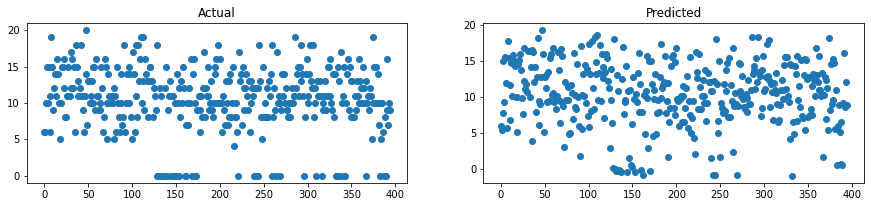

In [33]:
o=np.arange(0,len(y_pred4))
plt.figure(figsize=(15,10))

plt.subplot(321)

plt.scatter(o, y)
plt.title('Actual')
plt.subplot(322)

plt.scatter(o, y_pred4)
plt.title('Predicted')
plt.show()

### From Above Machine Learning Models by performance i took stacking model as it was showing low error and high performance. Stacking model was taken for further predictions of "GRADES"
### From above graph "Actual vs Prediction" it is clear that in actual graph we can see that at the base there are many students with low grades which have been increased in predictions.But there are many students in Predictions in range of 0-5 which should be focused.